In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
data = pd.read_csv("./dataset/cleaned_news_summary.csv")
data.head()

,Unnamed: 0,text,summary
0,0,administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within 24 hours issuin...,sostok daman diu revokes mandatory rakshabandhan in offices order eostok
1,1,malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacations user commented malaika responded certainly got get damn fa...,sostok malaika slams user who trolled her for divorcing rich man eostok
2,2,indira gandhi institute medical sciences igims patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woma...,sostok virgin now corrected to unmarried in igims form eostok
3,3,lashkaretaibas kashmir commander abu dujana killed security forces said kabhi hum aage kabhi aap aaj aapne pakad liya mubarak ho aapko today caught congratulations caught added wont surrender what...,sostok aaj aapne pakad liya let man dujana before being killed eostok
4,4,hotels maharashtra train staff spot signs sex trafficking including frequent requests bed linen changes disturb signs left room doors days mobile phone app called rescue allow staff alert police s...,sostok hotel staff to get training to spot signs of sex trafficking eostok


In [182]:
news = data.text
headline = data.summary
news_len = []
headline_len = []
for obj in range(len(news)):
    news_len.append(len(news[obj].split()))
    headline_len.append(len(headline[obj].split()))

In [183]:
max(news_len)

47

Text(0.5, 1.0, 'Distribution of length of news text')

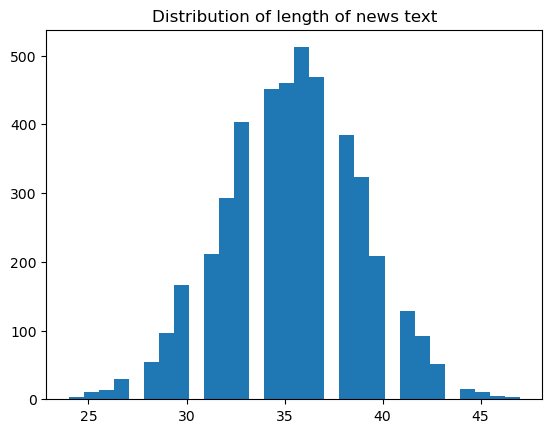

In [184]:
plt.hist(news_len, bins=30)
plt.title("Distribution of length of news text")

Text(0.5, 1.0, 'Distribution of length of headline text')

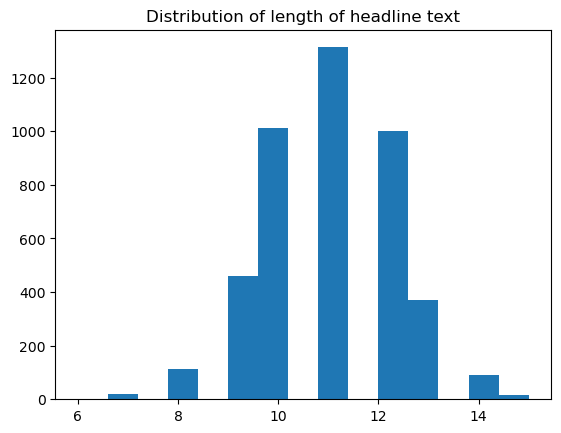

In [185]:
plt.hist(headline_len, bins=15)
plt.title("Distribution of length of headline text")

In [186]:
max_len_news = 40
max_len_headline = 11

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.text, data.summary, test_size=0.2, random_state=101, shuffle=True)

In [188]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, Concatenate, Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from attention_my import AttentionLayer


import warnings

pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore')

In [189]:
physical_devices = tf.config.list_physical_devices("GPU")
physical_devices
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]

In [190]:
# x_tokenizer = Tokenizer() 
# x_tokenizer.fit_on_texts(list(X_train))

In [191]:
# thresh=4

# cnt=0
# tot_cnt=0
# freq=0
# tot_freq=0

# for key,value in x_tokenizer.word_counts.items():
#     tot_cnt=tot_cnt+1
#     tot_freq=tot_freq+value
#     if(value<thresh):
#         cnt=cnt+1
#         freq=freq+value
    
# print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
# print("Total Coverage of rare words:",(freq/tot_freq)*100)

In [192]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

X_train_seq = X_tokenizer.texts_to_sequences(X_train)
X_test_seq = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_seq, maxlen = max_len_news, padding='post')
X_test = pad_sequences(X_test_seq, maxlen = max_len_news, padding='post')

news_vocab_size = len(X_tokenizer.word_index) + 1

In [193]:
# #prepare a tokenizer for reviews on training data
# y_tokenizer = Tokenizer()   
# y_tokenizer.fit_on_texts(list(y_train))

In [194]:
# thresh=6

# cnt=0
# tot_cnt=0
# freq=0
# tot_freq=0

# for key,value in y_tokenizer.word_counts.items():
#     tot_cnt=tot_cnt+1
#     tot_freq=tot_freq+value
#     if(value<thresh):
#         cnt=cnt+1
#         freq=freq+value
    
# print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
# print("Total Coverage of rare words:",(freq/tot_freq)*100)

In [195]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train_seq, maxlen=max_len_headline, padding='post')
y_test = pad_sequences(y_test_seq, maxlen=max_len_headline, padding='post')
y_voc_size = len(y_tokenizer.word_index) + 1

In [196]:
y_tokenizer.word_counts['eostok'], len(y_train)

(3516, 3516)

In [164]:
# encoder_inputs = Input(shape=(max_len_news,))
# encoder_embedding = Embedding(news_vocab_size, 64)(encoder_inputs)
# encoder_outputs, state_h, state_c = LSTM(64, return_state=True)(encoder_embedding)
# encoder_states = [state_h, state_c]

# # Build the decoder
# decoder_inputs = Input(shape=(None,))
# decoder_embedding = Embedding(y_voc_size, 64)(decoder_inputs)
# decoder_lstm = LSTM(64, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
# decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
# output = decoder_dense(decoder_outputs)

# # Build and compile the model
# model = Model([encoder_inputs, decoder_inputs], output)
# model.summary()
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [165]:
# model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:], batch_size=64, epochs=10, verbose=1)

In [197]:
from keras import backend as K
K.clear_session()

latent_dim=500

enc_inputs = Input(shape=(max_len_news,))
embedding1 = Embedding(news_vocab_size,latent_dim)(enc_inputs)

lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True)
enc_output1, h1, c1 = lstm1(embedding1)

lstm2 = LSTM(latent_dim, return_sequences=True,return_state=True)
enc_output2, h2, c2 = lstm2(enc_output1)

lstm3 = LSTM(latent_dim, return_sequences=True,return_state=True)
enc_outputs, h3, c3 = lstm3(enc_output2)


decoder_inputs = Input(shape=(None, ))
dec_embedding = Embedding(y_voc_size, latent_dim)
dec_emb_out = dec_embedding(decoder_inputs)

dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, fwd_state, back_state = dec_lstm(dec_emb_out, initial_state = [h3, c3])



# attn_layer = AttentionLayer(name='attention_layer') 
# attn_out, attn_state = attn_layer([enc_outputs, decoder_outputs])

# decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([enc_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 500)      9732000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 40, 500),    2002000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

In [198]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [199]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [200]:

history=model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=50,batch_size=512, callbacks=[es], validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/50
7/7 [==============================] - 149s 21s/step - loss: 8.7707 - accuracy: 0.1040 - val_loss: 7.6396 - val_accuracy: 0.1000
Epoch 2/50
7/7 [==============================] - 167s 25s/step - loss: 7.3301 - accuracy: 0.1000 - val_loss: 6.1871 - val_accuracy: 0.1068
Epoch 3/50
7/7 [==============================] - 127s 19s/step - loss: 6.9581 - accuracy: 0.1193 - val_loss: 6.0340 - val_accuracy: 0.1099
Epoch 4/50
7/7 [==============================] - 193s 29s/step - loss: 6.8053 - accuracy: 0.1236 - val_loss: 6.0892 - val_accuracy: 0.1134
Epoch 5/50
7/7 [==============================] - 236s 33s/step - loss: 6.7304 - accuracy: 0.1268 - val_loss: 6.0457 - val_accuracy: 0.1045
Epoch 5: early stopping


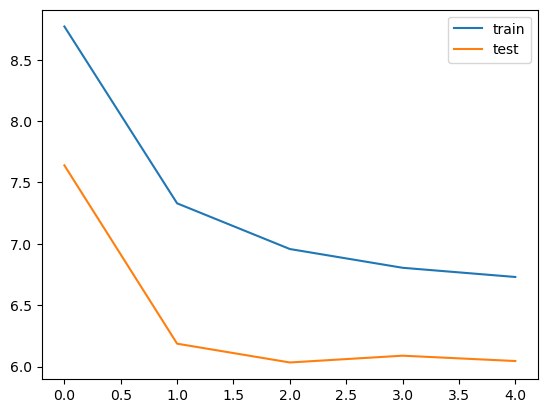

In [201]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()


In [202]:
reverse_target_word_index = y_tokenizer.index_word
reverse_news_words_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [203]:
encoder_model = Model(inputs = enc_inputs, outputs = [enc_outputs, h3, c3])

decoder_h = Input(shape=(latent_dim,))
decoder_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_news, latent_dim))


dec_emb2 = dec_embedding(decoder_inputs)

dec_output2, dec_h2, dec_c2 = dec_lstm(dec_emb2, initial_state=[decoder_h, decoder_c])




# attn_out_inf, attn_state_inf = attn_layer([decoder_hidden_state_input, dec_output2])

# dec_inf_concat = Concatenate(axis=-1, name='concat')([dec_output2, attn_out_inf])


dec_output2 = decoder_dense(dec_output2)


decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input, decoder_h, decoder_c], [dec_output2] + [dec_h2, dec_c2])

In [204]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 500)    3881000     ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 500)]        0           []                               
                                                                                            

In [205]:
def decode_sequence(input_sequence):
    e_out, e_h, e_c = encoder_model(input_sequence)

    target_seq = np.zeros((1,1))

    target_seq[0,0] = target_word_index['sostok']

    stop_condition = False


    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        
        sample_token_index = np.argmax(output_tokens[0,-1,:])
        sampled_token = reverse_target_word_index[sample_token_index]

        if sampled_token!='eostok':
            decoded_sentence+= ' ' + sampled_token

        if (sampled_token=='eostok' or len(decoded_sentence.split())>=(max_len_headline-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))

        target_seq[0,0] = target_word_index[sampled_token]


        e_h, e_c = h, c

    return decoded_sentence


In [206]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_news_words_index[i]+' '
    return newString

In [207]:
for i in range(3):
  print("Review:",seq2text(X_train[i]))
  print("Original summary:",seq2summary(y_train[i]))
  print("Predicted summary:",decode_sequence(X_train[i].reshape(1,max_len_news)))
  print("\n")

Review: new airport project navi mumbai take away 250 hectares forest land 106 hectares mangrove cover mangrove saplings planted across 160 hectares play crucial role stabilising coastlines rehabilitation 3000 families 12 villages vacated airport also directed 
Original summary: new mumbai airport to take away hectares of forest land 
1/1 [==============================] - 0s 28ms/step
Predicted summary:  to to to to to to in


Review: according reports actor shahid kapoor admitted starstruck twinkle khanna teenager reportedly revealed would wait hours catch glimpse twinkle hotel swimming pool shoot 1997 film itihaas shahids mother neelima azeem also part film 
Original summary: shahid reveals he was starstruck by twinkle as kid report 
1/1 [==============================] - 0s 26ms/step
Predicted summary:  to to to to to to in


Review: two sunbathers 56yearold man eightyearold girl killed wednesday light plane struck making emergency landing beach portugal others run sea save two occ

In [ ]:
reverse_target_word_index

{1: 'start',
 2: 'end',
 3: 'to',
 4: 'in',
 5: 'for',
 6: 'of',
 7: 'on',
 8: 'delhi',
 9: 'at',
 10: 'from',
 11: 'with',
 12: 'after',
 13: 'india',
 14: 'by',
 15: 'over',
 16: 'be',
 17: 'govt',
 18: 'as',
 19: 'not',
 20: 'up',
 21: 'is',
 22: 'man',
 23: 'the',
 24: 'mumbai',
 25: 'bjp',
 26: 'against',
 27: 'will',
 28: 'indian',
 29: 'report',
 30: 'modi',
 31: 'pm',
 32: 'us',
 33: 'was',
 34: 'cr',
 35: 'police',
 36: 'his',
 37: 'crore',
 38: 'woman',
 39: 'film',
 40: 'cm',
 41: 'new',
 42: 'case',
 43: 'arrested',
 44: 'no',
 45: 'lakh',
 46: 'who',
 47: 'it',
 48: 'first',
 49: 'sc',
 50: 'ban',
 51: 'indias',
 52: 'says',
 53: 'people',
 54: 'aap',
 55: 'pak',
 56: 'and',
 57: 'my',
 58: 'get',
 59: 'reports',
 60: 'st',
 61: 'out',
 62: 'women',
 63: 'has',
 64: 'trump',
 65: 'if',
 66: 'attack',
 67: 'years',
 68: 'air',
 69: 'can',
 70: 'kejriwal',
 71: 'have',
 72: 'me',
 73: 'china',
 74: 'hc',
 75: 'gets',
 76: 'jk',
 77: 'her',
 78: 'may',
 79: 'chief',
 80: 'ask

In [74]:
x = np.array([5,4,3,2,1])

In [75]:
np.argmax(x)

0